# **WASP Summer School**
## Behavior Tree Challenge

## Install the code repository and the used packages.

In [1]:
#!apt-get update #If apt install fails, run this

In [ ]:
#Make sure all code is available
#!rm -r WASP-CBSS-BT/
#!git clone https://github.com/jstyrud/WASP-CBSS-BT.git
#!pip install celluloid
#!apt install imagemagick

## Import the modules.

*Note that if you are not running the notebook on Colab, the paths might differ.*  
*In such a case run the following command on a shell to output the content of the current working directory.*  
```bash
!ls
```

In [1]:
#Setup paths and imports
import sys
sys.path.insert(0,'/content/WASP-CBSS-BT')
from IPython.display import Image
import simulation.notebook_interface as notebook_interface
import simulation.behavior_tree as behavior_tree
behavior_tree.load_settings_from_file('simulation/tests/BT_TEST_SETTINGS.yaml')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pathlib import Path

## Build your own Behavior Tree and test it!

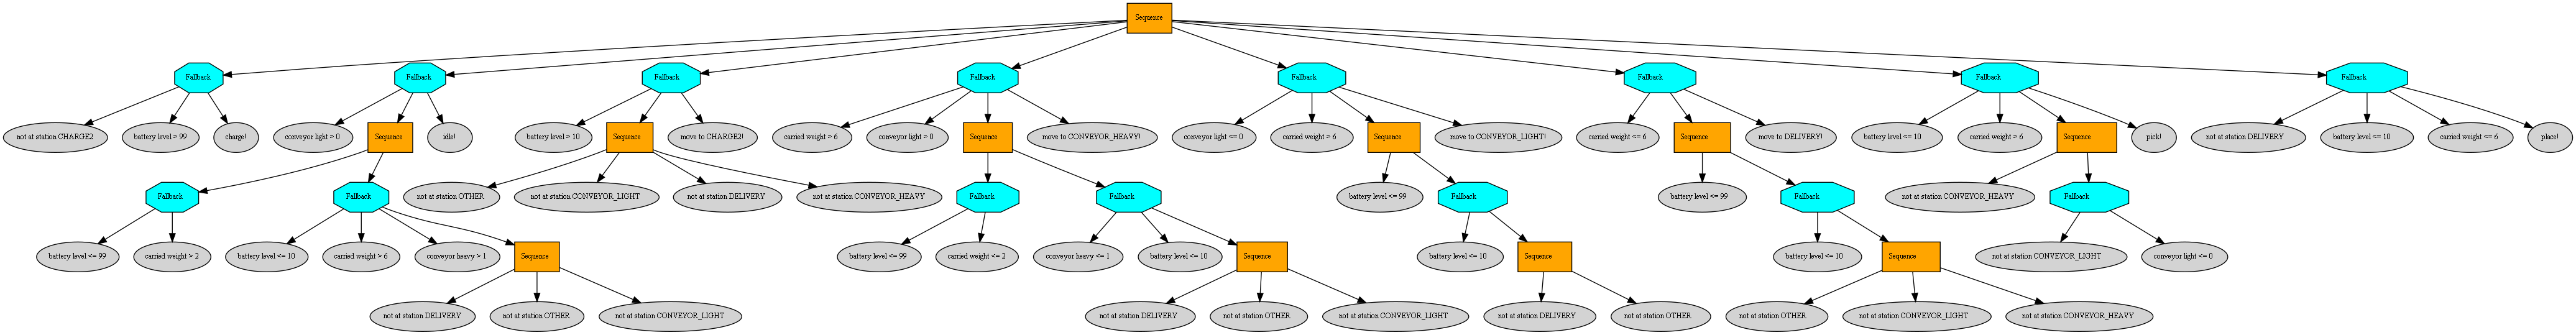

In [3]:
individual =       [ 's(', 'f(', 'not at station CHARGE2','battery level > 99','charge!', ')', 
 'f(', 'conveyor light > 0', 's(',  'f(', 'battery level <= 99','carried weight > 2',')', 'f(', 'battery level <= 10','carried weight > 6','conveyor heavy > 1', 's(', 'not at station DELIVERY','not at station OTHER','not at station CONVEYOR_LIGHT',')',')',')','idle!', ')', 
 'f(', 'battery level > 10', 's(', 'not at station OTHER','not at station CONVEYOR_LIGHT','not at station DELIVERY','not at station CONVEYOR_HEAVY',')','move to CHARGE2!', ')', 
 'f(', 'carried weight > 6','conveyor light > 0', 's(',  'f(', 'battery level <= 99','carried weight <= 2',')', 'f(', 'conveyor heavy <= 1','battery level <= 10', 's(', 'not at station DELIVERY','not at station OTHER','not at station CONVEYOR_LIGHT',')',')',')','move to CONVEYOR_HEAVY!', ')', 
 'f(', 'conveyor light <= 0','carried weight > 6', 's(', 'battery level <= 99', 'f(', 'battery level <= 10', 's(', 'not at station DELIVERY','not at station OTHER',')',')',')','move to CONVEYOR_LIGHT!', ')', 
 'f(', 'carried weight <= 6', 's(', 'battery level <= 99', 'f(', 'battery level <= 10', 's(', 'not at station OTHER','not at station CONVEYOR_LIGHT','not at station CONVEYOR_HEAVY',')',')',')','move to DELIVERY!', ')', 
 'f(', 'battery level <= 10','carried weight > 6', 's(', 'not at station CONVEYOR_HEAVY', 'f(', 'not at station CONVEYOR_LIGHT','conveyor light <= 0',')',')','pick!', ')', 
 'f(', 'not at station DELIVERY','battery level <= 10','carried weight <= 6','place!', ')', 
]
environment = notebook_interface.Environment(seed=1, verbose=False)
environment.plot_individual('', 'behavior_tree', individual)

Image('behavior_tree.png') 

In [4]:
#Run individual and print result (takes a lot less time with show_world=False)
print("Fitness:", environment.get_fitness(individual, max_ticks=200, show_world=True, seed=environment.seed)) 

seed 1
Fitness: (45.0, 11, 23)


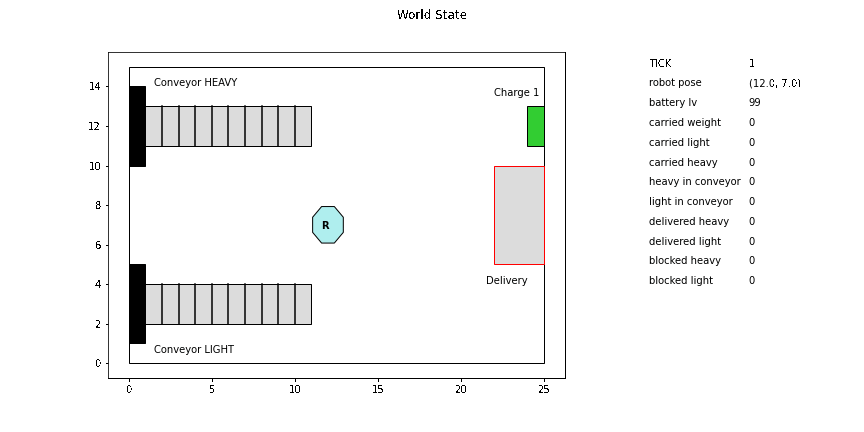

In [5]:
#Animate the last run (that had show_world=True)
gifPath = Path("animation.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    Image(data=f.read(), format='png')

In [11]:
#Step the run instead, first reset the environment
step_environment = notebook_interface.Environment(seed=0, verbose=False)

In [ ]:
#Step the run one step.
#Execute the cell again to step forward.
#Color coding of states:
#green  = success
#red    = failure
#yellow = running
#gray   = not ticked
number_of_steps = 1 #Change this to step more than once
for _ in range(number_of_steps):
    step_environment.step(individual, show_world=True)
    step_environment.pytree.save_fig('','behavior_tree', static=False)
    
    with open(Path("/content/behavior_tree.png"),'rb') as f:
      Image(data=f.read(), format='png')